<a href="https://colab.research.google.com/github/dev-SR/machine-learning/blob/main/03plotly/plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotly.py

In [2]:
"""
cd .\03plotly\
jupyter nbconvert --to markdown plotly.ipynb --output README.md

 """

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

# plotly
import plotly.express as px
import plotly.graph_objs as go


## Scatter Plot

In [3]:
# Create a sample DataFrame
df = px.data.tips()
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [4]:
# Create a 2D scatter plot
fig = px.scatter(df, x='total_bill', y='tip')
fig.show()

In [5]:
fig = px.scatter(df, x='total_bill', y='tip' , color='smoker',size='size')
fig.show()

If you want to see `day` information while hovering then ->

In [6]:
fig = px.scatter(df, x='total_bill', y='tip' , color='smoker',size='size', hover_data=['day'])
fig.show()

In [7]:
# Create a 3D scatter plot
fig = px.scatter_3d(df, x='total_bill', y='tip', z='size', color='smoker', size='size', size_max=15,
                   title='3D Scatter Plot of Total Bill, Tip, and Size')
fig.update_layout(width=800, height=800)
fig.show()

## Save to Pdf/PNG..

In [ ]:
# !pip install -U kaleido

In [ ]:
fig = px.scatter(df, x='total_bill', y='tip' , color='smoker',size='size')
fig.write_image('scatter_plot.pdf', format='pdf', width=1000, height=500, scale=3.33)
# scale ~ (width / dpi) =  (1000 / 300) = 3.33


## 🔥 Example

### Joint PDFs + Area Under Curve

In [10]:
from scipy.integrate import quad
from scipy.stats import multivariate_normal
# def pdf(data, mean: float, variance: float):
#   # A normal continuous random variable.
#   s1 = 1 / (np.sqrt(2 * np.pi * variance))
#   s2 = np.exp(-(np.square(data - mean) / (2 * variance)))
#   return s1 * s2
np.random.seed(0)
PC1 = np.random.normal(1, 1, 100)
PC2 = np.random.normal(0, 1, 100)
text1 = "PC1"
text2 = "PC2"
x_start, x_end = -10, 10
x = np.linspace(x_start, x_end, 1000)
pdf1 = multivariate_normal.pdf(x, mean=PC1.mean(), cov=PC1.var())
pdf2 = multivariate_normal.pdf(x, mean=PC2.mean(), cov=PC2.var())
AUC = np.min(np.vstack((pdf1, pdf2)), axis=0)

# Overlap Percentage Calculation
overlap, _ = quad(lambda x: np.minimum(
multivariate_normal.pdf(x, mean=PC1.mean(), cov=PC1.var()), multivariate_normal.pdf(x, mean=PC2.mean(), cov=PC2.var())), -np.inf, np.inf)
percent_overlap = 100 * overlap

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=pdf1, name="pdf1"))
fig.add_trace(go.Scatter(x=x, y=pdf2, name="pdf2"))
fig.add_trace(go.Scatter(x=x, y=AUC, fill='tozeroy',fillcolor='rgba(0,100,110,0.5)', name=f"Overlap: {round(percent_overlap,2)}%"))

fig.add_annotation(x=PC1.mean(), y=np.max(pdf1), text=text1,arrowhead=2,showarrow=True)
fig.add_annotation(x=PC2.mean(), y=np.max(pdf2), xref='x', yref='y', text=text2, ax=1, ay=-50, arrowhead=2, arrowsize=1, arrowwidth=1, arrowcolor='black', showarrow=True)

fig.update_layout(width=1000, height=500)
fig.show()

`Matplotlib` Alternative:

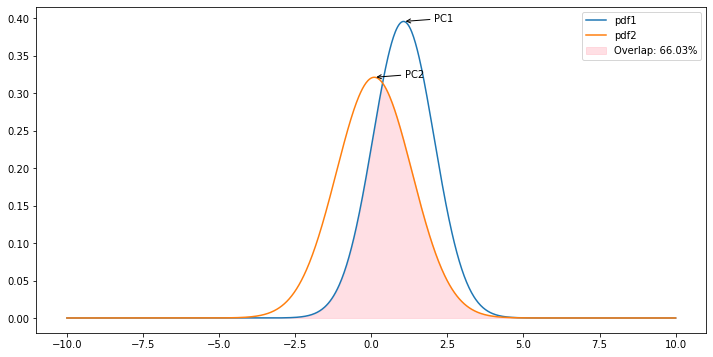

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import norm
from scipy.stats import multivariate_normal

np.random.seed(0)
PC1 = np.random.normal(1, 1, 100)
PC2 = np.random.normal(0, 1.2, 100)
text1 = "PC1"
text2 = "PC2"
x_start, x_end = -10, 10
x = np.linspace(x_start, x_end, 1000)
pdf1 = multivariate_normal.pdf(x, mean=PC1.mean(), cov=PC1.var())
pdf2 = multivariate_normal.pdf(x, mean=PC2.mean(), cov=PC2.var())
AUC = np.min(np.vstack((pdf1, pdf2)), axis=0)
overlap, _ = quad(lambda x: np.minimum(
multivariate_normal.pdf(x, mean=PC1.mean(), cov=PC1.var()), multivariate_normal.pdf(x, mean=PC2.mean(), cov=PC2.var())), -np.inf, np.inf)
percent_overlap = 100 * overlap

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x, pdf1, label='pdf1')
ax.plot(x, pdf2, label='pdf2')
ax.fill_between(x, 0, AUC, color='pink', alpha=0.5, label=f"Overlap: {round(percent_overlap,2)}%")
ax.annotate(text1,
            xy=tuple([PC1.mean(), np.max(pdf1)]),
            xytext=tuple([PC1.mean()+1, np.max(pdf1)]),
            arrowprops=dict(arrowstyle="->"),
            )
ax.annotate(text2,
             xy=tuple([PC2.mean(), np.max(pdf2)]),
             xytext=tuple([PC2.mean() + 1, np.max(pdf2)]),
             arrowprops=dict(arrowstyle="->"),
             )

ax.legend()
plt.show()